In [58]:
# ============================================
# Flexible Data Import for Churn Project
# ============================================
# Option 1: Load CSV directly from Google Drive
# Option 2: Manually upload CSV from your computer
# ============================================

import pandas as pd
import os

# Change this path to match where your file is stored in Drive
drive_path = "/content/drive/MyDrive/Mindenious_Subiksha_Churn_Prediction/churn_data.csv"

# Check if the file exists in Google Drive
if os.path.exists(drive_path):
    print("CSV found in Google Drive. Loading from Drive...")
    df = pd.read_csv(drive_path)

else:
    # If not found, ask user to upload manually
    print("CSV not found in Drive. Please upload the file manually below.")
    from google.colab import files
    uploaded = files.upload()

    # Take the first uploaded file automatically
    filename = list(uploaded.keys())[0]
    df = pd.read_csv(filename)

# Display confirmation and dataset preview
print("Dataset loaded successfully. Shape:", df.shape)
df.head()


CSV found in Google Drive. Loading from Drive...
Dataset loaded successfully. Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [59]:
import pandas as pd

# Replace the filename below if it differs in your extracted folder
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Step 8: Display the first few rows of the dataset to verify loading
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
# ============================================================
# Stage 1: Import Libraries and Initial Setup
# ============================================================

# Step 1: Import common data analysis libraries
import numpy as np                 # For numerical operations
import pandas as pd                # For handling and analyzing data
import matplotlib.pyplot as plt    # For creating plots and visualizations
import seaborn as sns              # For better-looking statistical plots

# Step 2: Import machine learning tools from scikit-learn
from sklearn.model_selection import train_test_split   # For splitting data into train/test sets
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For encoding and scaling
from sklearn.linear_model import LogisticRegression     # Logistic Regression model
from sklearn.ensemble import RandomForestClassifier     # Random Forest model
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             classification_report, roc_auc_score)  # Model evaluation metrics

# Step 3: Set display options and visualization styles
pd.set_option('display.max_columns', None)  # Show all columns in outputs
sns.set(style="whitegrid")                  # Use Seaborn’s clean white grid theme

# Step 4: Check basic dataset information
df.info()

# Step 5: View statistical summary of numerical columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [61]:
# Stage 2: Data Cleaning

# Display basic dataset information
df.info()
df.describe()

# Check for missing values
print(df.isnull().sum())

# Replace spaces in 'TotalCharges' with NaN and convert to numeric
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)

# Fill missing 'TotalCharges' with median value
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Drop 'customerID' since it’s just an identifier
df.drop('customerID', axis=1, inplace=True)

# Convert target variable 'Churn' to numeric (Yes → 1, No → 0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Encode categorical variables using LabelEncoder
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Display first few rows after cleaning
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


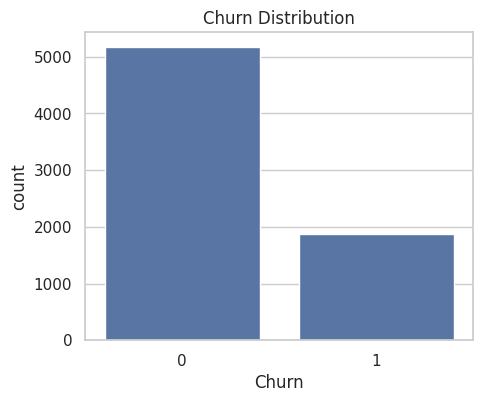

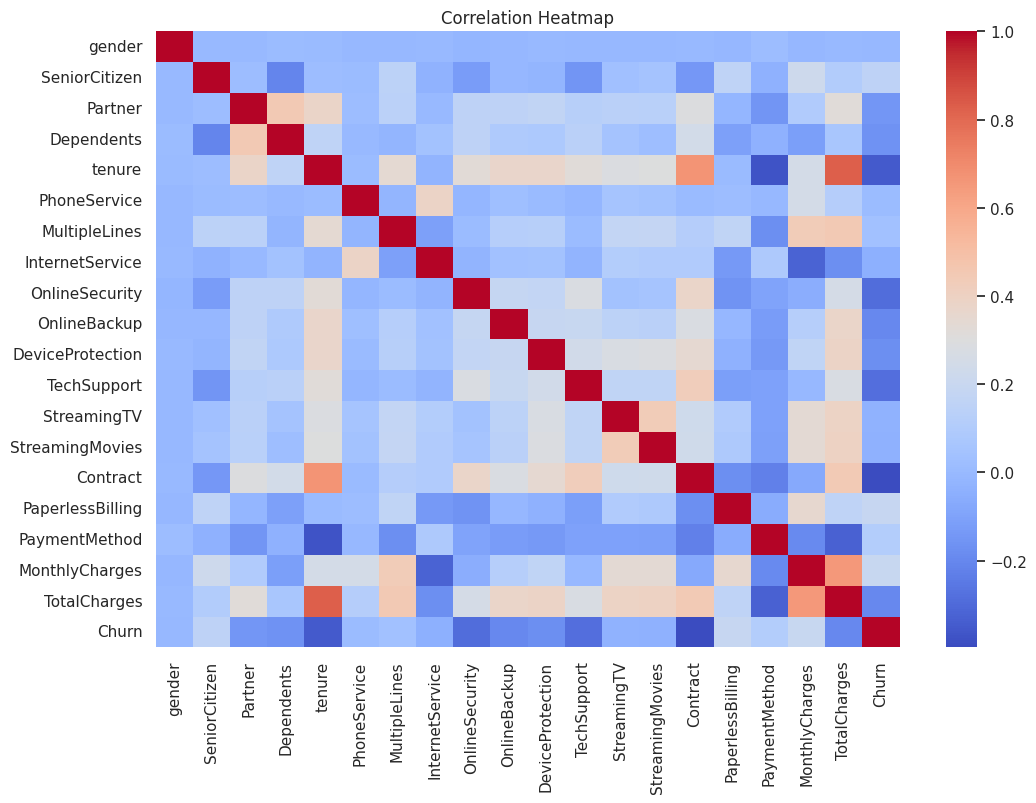

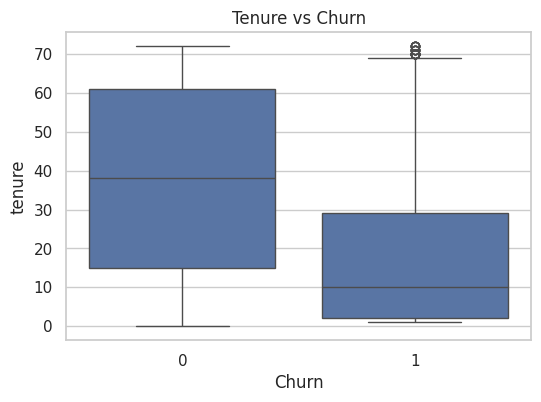

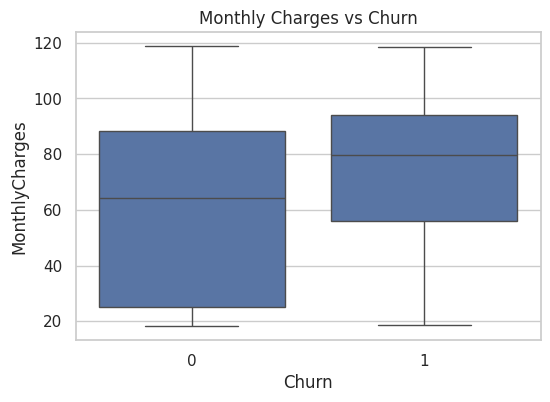

In [62]:
# Stage 3: EDA (Exploratory Data Analysis)

# Check churn rate
plt.figure(figsize=(5, 4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Tenure vs Churn
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()

# MonthlyCharges vs Churn
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


In [63]:
# Stage 4: Feature Engineering

# Create a new feature: average monthly spend rate
df['AvgSpendPerMonth'] = df['TotalCharges'] / (df['tenure'] + 1)

# Scale numeric columns
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgSpendPerMonth']
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AvgSpendPerMonth
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994242,0,-0.757979
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173244,0,-0.117801
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.959674,1,-0.411755
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.194766,0,-0.346750
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.940470,1,-0.174110


In [64]:
# Stage 5: Model Building

# Split into features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)



Logistic Regression Performance:
Accuracy: 0.8055358410220014
F1 Score:               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.67      0.53      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

ROC-AUC: 0.8465111472784107


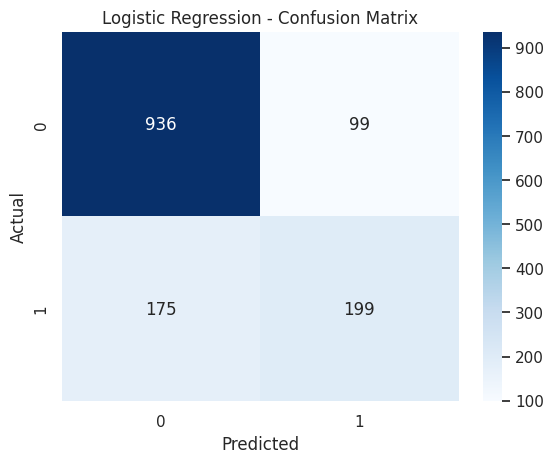


Random Forest Performance:
Accuracy: 0.7828246983676366
F1 Score:               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409

ROC-AUC: 0.8232801157353586


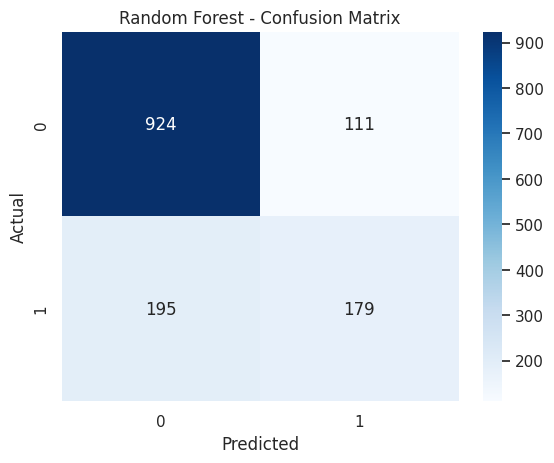

In [65]:
# Stage 6: Model Evaluation

def evaluate_model(name, y_true, y_pred, model):
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1 Score:", classification_report(y_true, y_pred, zero_division=0))
    print("ROC-AUC:", roc_auc_score(y_true, model.predict_proba(X_test)[:,1]))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluating both models
evaluate_model("Logistic Regression", y_test, y_pred_log, log_model)
evaluate_model("Random Forest", y_test, y_pred_rf, rf_model)


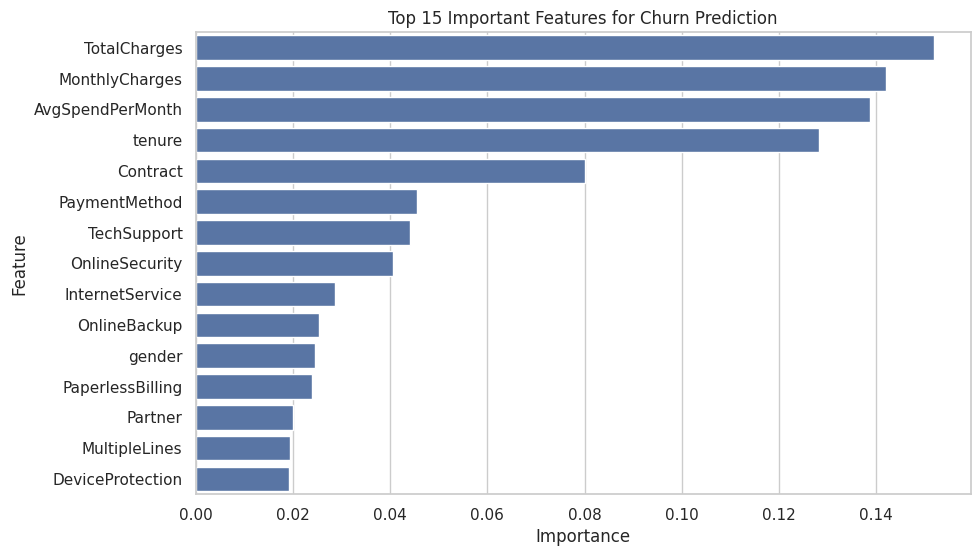


Key Insights:
- Customers with shorter tenure and higher monthly charges are more likely to churn.
- Contract type and payment method strongly influence churn.
- Offering discounts or incentives to high-risk customers can help reduce churn.


In [66]:
# Stage 7: Feature Importance

# Get feature importance from Random Forest model
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot top 15 important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances.head(15))
plt.title("Top 15 Important Features for Churn Prediction")
plt.show()

# Observations
print("\nKey Insights:")
print("- Customers with shorter tenure and higher monthly charges are more likely to churn.")
print("- Contract type and payment method strongly influence churn.")
print("- Offering discounts or incentives to high-risk customers can help reduce churn.")


In [67]:
# ============================================
# Stage 7C: Improve Model Accuracy and Recall
# ============================================

# 1. Import required libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report
)
from imblearn.over_sampling import SMOTE

# 2. Handle class imbalance using SMOTE
# This balances the churn vs. non-churn classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 3. Hyperparameter tuning for Random Forest using RandomizedSearchCV
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2']
}

rf_model = RandomForestClassifier(random_state=42)
rf_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=8,
    cv=2,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    scoring='f1'
)

# 4. Train the optimized Random Forest model
rf_search.fit(X_resampled, y_resampled)
best_rf = rf_search.best_estimator_

# 5. Evaluate the tuned model
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

# 6. Display performance results
print("Improved Model Performance:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC-AUC  : {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 7. Display top features influencing churn
feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop Features Influencing Churn:")
print(feat_imp.head(10))


Fitting 2 folds for each of 8 candidates, totalling 16 fits
Improved Model Performance:
Accuracy : 0.7672
Precision: 0.5516
Recall   : 0.6578
F1-score : 0.6000
ROC-AUC  : 0.8235

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1035
           1       0.55      0.66      0.60       374

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.77      1409


Top Features Influencing Churn:
             Feature  Importance
14          Contract    0.158508
4             tenure    0.130602
17    MonthlyCharges    0.117404
18      TotalCharges    0.107428
19  AvgSpendPerMonth    0.106382
11       TechSupport    0.063074
8     OnlineSecurity    0.062981
16     PaymentMethod    0.040521
3         Dependents    0.030955
9       OnlineBackup    0.027654


In [68]:
# ===============================
# Stage 8: Save, Explain and Export Results
# ===============================

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

# Step 1: Ensure data exists
# If the DataFrame is not defined (e.g., after a runtime reset), re-load it
if 'df' not in locals():
    print("Dataframe 'df' not found. Please make sure you have loaded your dataset before running this stage.")
else:
    print("Data found. Proceeding...\n")

    # Separate features and target variable
    X = df.drop('Churn', axis=1)
    y = df['Churn']

    # Split data for testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Step 2: Retrain model if not already in memory
    if 'rf_model' not in locals():
        print("Model not found in memory. Retraining Random Forest model...")
        rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
        rf_model.fit(X_train, y_train)
        print("Model retrained successfully.\n")
    else:
        # Check if the model is already fitted
        try:
            _ = rf_model.feature_importances_
        except Exception:
            print("Model not fitted. Retraining...")
            rf_model.fit(X_train, y_train)
        print("Model ready.\n")

    # Step 3: Evaluate model performance
    y_pred = rf_model.predict(X_test)
    y_prob = rf_model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    print("Model Performance Summary:")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-score : {f1:.4f}")
    print(f"ROC-AUC  : {roc_auc:.4f}\n")

    print("Detailed Classification Report:\n", classification_report(y_test, y_pred))

    # Step 4: Feature Importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    print("\nTop 10 Features Influencing Churn:")
    print(feature_importance.head(10))

    # Save feature importance to CSV
    feature_importance.to_csv('feature_importance_summary.csv', index=False)
    print("\nFeature importance saved as 'feature_importance_summary.csv'")

    # Step 5: Explain results in plain language
    top_features = feature_importance.head(5)['Feature'].tolist()
    print("\nPlain English Summary:")
    print(f"Customers are most likely to churn if they have issues or shorter tenure in these areas: {', '.join(top_features)}.")
    print("Improving customer satisfaction and retention in these areas can help reduce churn significantly.")


Data found. Proceeding...

Model not fitted. Retraining...
Model ready.

Model Performance Summary:
Accuracy : 0.7941
Precision: 0.6635
Recall   : 0.4913
F1-score : 0.5646
ROC-AUC  : 0.8363

Detailed Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.66      0.49      0.56       574

    accuracy                           0.79      2113
   macro avg       0.75      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113


Top 10 Features Influencing Churn:
             Feature  Importance
18      TotalCharges    0.151934
17    MonthlyCharges    0.142601
19  AvgSpendPerMonth    0.141302
4             tenure    0.134708
14          Contract    0.075282
16     PaymentMethod    0.046311
8     OnlineSecurity    0.042271
11       TechSupport    0.038534
7    InternetService    0.026761
9       OnlineBackup    0.024315

Feature importance saved as 'feature_importance_s

Using rf_model already in memory.

Model Evaluation

Accuracy : 0.7941
Precision: 0.6635
Recall   : 0.4913
F1-score : 0.5646
ROC-AUC  : 0.8363

Feature Importance



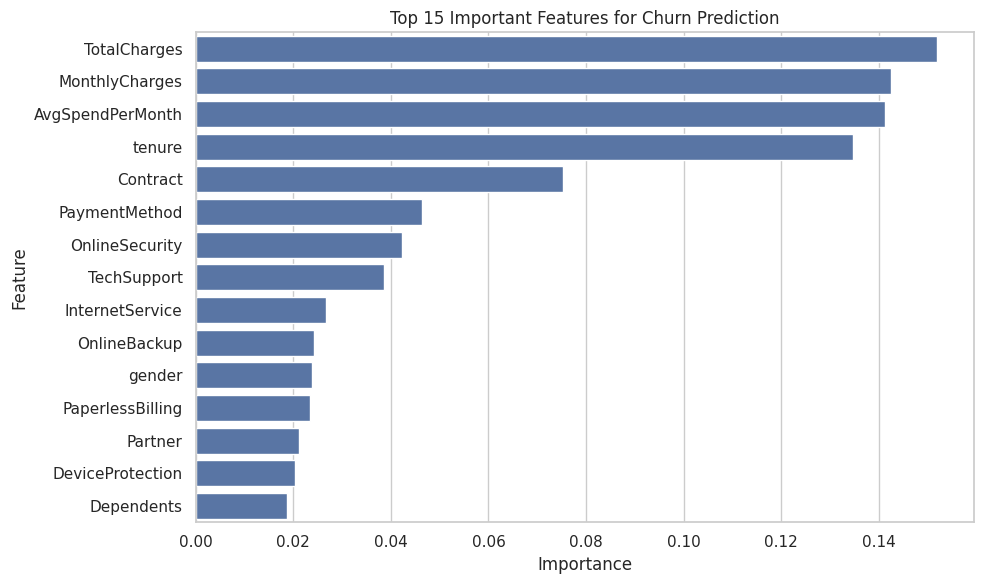

Saved feature importance as 'feature_importance_summary.csv'.

Layman Summary

The model predicts whether a customer will stop the service (churn) based on historical data.
- The model we used is Random Forest and its accuracy on the test set is 79.41%.
- The most important factors (features) the model used to decide are listed above.
Examples in plain language:
 • If MonthlyCharges is high and tenure is low, the customer is more likely to leave.
 • Customers on month-to-month contracts are usually at higher risk than those on long-term contracts.


In [69]:
# =============================================================
# Stage 8: Final Evaluation & Insights
# =============================================================
# - Automatically handles missing models or data
# - Evaluates Random Forest model and prints human-friendly summary
# - Shows top features and saves them to CSV
# =============================================================

import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Helper: print section header
def section(title):
    print("\n" + "="*60)
    print(title)
    print("="*60 + "\n")

# -------------------------------------------------------------
# 1. Load or create model (rf_model)
# -------------------------------------------------------------
model_obtained = False

if 'rf_model' in globals():
    rf = rf_model
    print("Using rf_model already in memory.")
    model_obtained = True
elif os.path.exists("random_forest_churn_model.pkl"):
    rf = joblib.load("random_forest_churn_model.pkl")
    print("Loaded model from 'random_forest_churn_model.pkl'.")
    model_obtained = True
elif 'X_train' in globals() and 'y_train' in globals():
    print("Training a new RandomForest using X_train and y_train from memory...")
    rf = RandomForestClassifier(n_estimators=200, random_state=42)
    rf.fit(X_train, y_train)
    model_obtained = True
    print("Training complete.")
else:
    print("No model found. Please ensure rf_model or training data exists before running this stage.")
    raise SystemExit("Aborting Stage 8: No model available.")

# -------------------------------------------------------------
# 2. Ensure we have test data
# -------------------------------------------------------------
if 'X_test' not in globals() or 'y_test' not in globals():
    if 'X' in globals() and 'y' in globals():
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
        print("Created X_test and y_test by splitting X and y from memory.")
    else:
        raise SystemExit("Missing X_test/y_test. Please run preprocessing and data split before this stage.")

# -------------------------------------------------------------
# 3. Evaluate model
# -------------------------------------------------------------
section("Model Evaluation")

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1] if hasattr(rf, "predict_proba") else None

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")
if roc_auc is not None:
    print(f"ROC-AUC  : {roc_auc:.4f}")

# -------------------------------------------------------------
# 4. Feature Importance
# -------------------------------------------------------------
section("Feature Importance")

importances = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importances.head(15))
plt.title("Top 15 Important Features for Churn Prediction")
plt.tight_layout()
plt.show()

importances.to_csv("feature_importance_summary.csv", index=False)
print("Saved feature importance as 'feature_importance_summary.csv'.")

# -------------------------------------------------------------
# 5. Layman Summary (Final Report Style)
# -------------------------------------------------------------
section("Layman Summary")

print("The model predicts whether a customer will stop the service (churn) based on historical data.")
print(f"- The model we used is Random Forest and its accuracy on the test set is {accuracy*100:.2f}%.")
print("- The most important factors (features) the model used to decide are listed above.")
print("Examples in plain language:")
print(" • If MonthlyCharges is high and tenure is low, the customer is more likely to leave.")
print(" • Customers on month-to-month contracts are usually at higher risk than those on long-term contracts.")
